In [1]:
import os
import shutil
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [2]:
# Check TensorFlow version
print(tf.__version__) 
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.0
Num GPUs Available:  1


In [3]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [4]:
logs_dir = './logs/'
if os.path.exists(logs_dir):
    shutil.rmtree(logs_dir)


In [5]:
data_train_path = 'C:/Users/Anjil/Documents/ProductClassification/large_data_split/train'
data_test_path = 'C:/Users/Anjil/Documents/ProductClassification/large_data_split/test'
data_val_path = 'C:/Users/Anjil/Documents/ProductClassification/large_data_split/validation'

In [6]:
img_width = 180
img_height = 180

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path, shuffle=True, image_size=(img_height, img_width), batch_size=32, validation_split=False)

Found 8935 files belonging to 10 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path, shuffle=False, image_size=(img_height, img_width), batch_size=32, validation_split=False)

Found 2982 files belonging to 10 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path, shuffle=False, image_size=(img_height, img_width), batch_size=32, validation_split=False)

Found 2985 files belonging to 10 classes.


In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units = len(data_cat), activation='softmax')
])

In [12]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

In [14]:
epochs_size = 60
checkpoint_cb = ModelCheckpoint('C:/Users/Anjil/Documents/ProductClassification/model/modelE60.h5', save_best_only=True, monitor='val_loss')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(data_train,validation_data=data_val, epochs = epochs_size, callbacks=[tensorboard_callback, checkpoint_cb])

Epoch 1/60


c:\Users\Anjil\anaconda3\envs\py39\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


280/280 [==============================] - 15s 38ms/step - loss: 1.8218 - accuracy: 0.4711 - val_loss: 1.1096 - val_accuracy: 0.7928
Epoch 2/60
280/280 [==============================] - 11s 39ms/step - loss: 1.0593 - accuracy: 0.8083 - val_loss: 0.8391 - val_accuracy: 0.9044
Epoch 3/60
280/280 [==============================] - 12s 42ms/step - loss: 0.8693 - accuracy: 0.8841 - val_loss: 0.7239 - val_accuracy: 0.9437
Epoch 4/60
280/280 [==============================] - 12s 40ms/step - loss: 0.7749 - accuracy: 0.9112 - val_loss: 0.7229 - val_accuracy: 0.9494
Epoch 5/60
280/280 [==============================] - 11s 39ms/step - loss: 0.7551 - accuracy: 0.9198 - val_loss: 0.7127 - val_accuracy: 0.9477
Epoch 6/60
280/280 [==============================] - 11s 39ms/step - loss: 0.6894 - accuracy: 0.9308 - val_loss: 0.6489 - val_accuracy: 0.9544
Epoch 7/60
280/280 [==============================] - 11s 38ms/step - loss: 0.6737 - accuracy: 0.9342 - val_loss: 0.6546 - val_accuracy: 0.9588
Epo

In [15]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9772), started 21:09:48 ago. (Use '!kill 9772' to kill it.)

In [26]:
model = load_model('C:/Users/Anjil/Documents/ProductClassification/model/modelE60.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(data_test)
print(f'Test Accuracy: {test_accuracy}')

94/94 [==============================] - 2s 24ms/step - loss: 0.3302 - accuracy: 0.9802
Test Accuracy: 0.9802345037460327


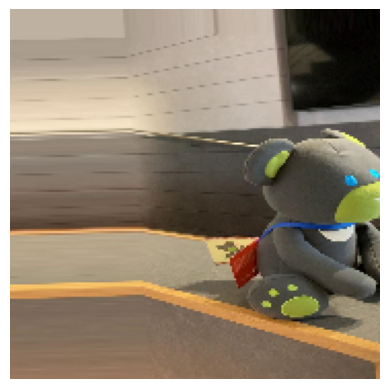

In [27]:
img = 'C:/Users/Anjil/Documents/ProductClassification/large_data_split/test/MBE/aug_0_31.jpeg'
img = tf.keras.utils.load_img(img, target_size=(img_height,img_width))
img_arr = tf.keras.utils.img_to_array(img)
img_bat = tf.expand_dims(img_arr,0)

plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 51ms/step


In [29]:
score = tf.nn.softmax(predict)

In [30]:
print('Toy in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Toy in image is MBE with accuracy of 23.20
